In [1]:
import numpy as np
import xarray as xr
import pandas as pd
from salishsea_tools import viz_tools, places, visualisations
from matplotlib import pyplot as plt, dates
from datetime import datetime, timedelta
from calendar import month_name
from scipy.io import loadmat
from tqdm.notebook import tqdm
from salishsea_tools import nc_tools
from dask.diagnostics import ProgressBar
import cmocean

%matplotlib inline

In [2]:
plt.rcParams.update({'font.size': 12, 'axes.titlesize': 'medium'})

### Import monthly files for Diatoms

In [3]:

#years, months, data
monthly_array_diatoms_depthint_slice = np.zeros([14,12,50,50])
# Load monthly averages
mask = xr.open_dataset('/data/eolson/results/MEOPAR/NEMO-forcing-new/grid/mesh_mask201702.nc')
slc = {'y': slice(450,500), 'x': slice(250,300)}
e3t, tmask = [mask[var].isel(z=slice(None, 27),**slc).values for var in ('e3t_0', 'tmask')]
years, variables = range(2007, 2021), ['diatoms']
# Temporary list dict
data = {}
# Permanent aggregate dict
aggregates = {var: {} for var in variables}
monthlydat = {var: {} for var in variables}

# Loop through years
for year in [2007,2008,2009,2010,2011,2012,2016,2017,2018,2019,2020]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(1, 13):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/v201905r/SalishSea_1m_{datestr}_{datestr}'
        
        # Load grazing variables
        with xr.open_dataset(prefix + '_ptrc_T.nc') as ds:
            q = np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 27), **slc).values * e3t).sum(axis=1).data
            q2 = q[0,:,:]
            monthly_array_diatoms_depthint_slice[year-2007,month-1,:,:] = q2 #year2015 is index 0 along 1st dimension
            for var in ['diatoms']:
                data[var].append(np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 27), **slc).values * e3t).sum(axis=1).data)
    
    # Concatenate months
    for var in variables: aggregates[var][year] = np.concatenate(data[var]).mean(axis=0)

# Loop through years for wrap files
for year in [2013,2014,2015]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(1, 13):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/v201905r_wrap/SalishSea_1m_{datestr}_{datestr}'
        
        # Load grazing variables
        with xr.open_dataset(prefix + '_ptrc_T.nc') as ds:
            q = np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 27), **slc).values * e3t).sum(axis=1).data
            q2 = q[0,:,:]
            monthly_array_diatoms_depthint_slice[year-2007,month-1,:,:] = q2 #year2015 is index 0 along 1st dimension
            for var in ['diatoms']:
                data[var].append(np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 27), **slc).values * e3t).sum(axis=1).data)
    
    # Concatenate months
    for var in variables: aggregates[var][year] = np.concatenate(data[var]).mean(axis=0)
        
# # Calculate 5 year mean and anomalies
# for var in variables:
#     aggregates[var][‘mean’] = np.concatenate([aggregates[var][year][None, ...] for year in years]).mean(axis=0)
#     for year in years: aggregates[var][year] = aggregates[var][year] - aggregates[var][‘mean’]



In [4]:
monthly_array_diatoms_depthint_slice[monthly_array_diatoms_depthint_slice == 0 ] = np.nan
monthly_array_diatoms_depthint_slicemean = \
np.nanmean(np.nanmean(monthly_array_diatoms_depthint_slice, axis = 2),axis = 2)
print(np.shape(monthly_array_diatoms_depthint_slicemean))

(14, 12)


### Import monthly files for nanoflagellates

In [5]:

#years, months, data
monthly_array_flagellates_depthint_slice = np.zeros([14,12,50,50])
# Load monthly averages
mask = xr.open_dataset('/data/eolson/results/MEOPAR/NEMO-forcing-new/grid/mesh_mask201702.nc')
slc = {'y': slice(450,500), 'x': slice(250,300)}
e3t, tmask = [mask[var].isel(z=slice(None, 27),**slc).values for var in ('e3t_0', 'tmask')]
years, variables = range(2007, 2021), ['flagellates']
# Temporary list dict
data = {}
# Permanent aggregate dict
aggregates = {var: {} for var in variables}
monthlydat = {var: {} for var in variables}

# Loop through years
for year in [2007,2008,2009,2010,2011,2012,2016,2017,2018,2019,2020]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(1, 13):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/v201905r/SalishSea_1m_{datestr}_{datestr}'
        # Load grazing variables
        with xr.open_dataset(prefix + '_ptrc_T.nc') as ds:
            q = np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 27), **slc).values * e3t).sum(axis=1).data
            q2 = q[0,:,:]
            monthly_array_flagellates_depthint_slice[year-2007,month-1,:,:] = q2 #year2015 is index 0 along 1st dimension
            for var in ['flagellates']:
                data[var].append(np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 27), **slc).values * e3t).sum(axis=1).data)
    # Concatenate months
    for var in variables: aggregates[var][year] = np.concatenate(data[var]).mean(axis=0)

# Loop through years for wrap files
for year in [2013,2014,2015]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(1, 13):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/v201905r_wrap/SalishSea_1m_{datestr}_{datestr}'
        # Load grazing variables
        with xr.open_dataset(prefix + '_ptrc_T.nc') as ds:
            q = np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 27), **slc).values * e3t).sum(axis=1).data
            q2 = q[0,:,:]
            monthly_array_flagellates_depthint_slice[year-2007,month-1,:,:] = q2 #year2015 is index 0 along 1st dimension
            for var in ['flagellates']:
                data[var].append(np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 27), **slc).values * e3t).sum(axis=1).data)
    # Concatenate months
    for var in variables: aggregates[var][year] = np.concatenate(data[var]).mean(axis=0)      
        
        
# # Calculate 5 year mean and anomalies
# for var in variables:
#     aggregates[var][‘mean’] = np.concatenate([aggregates[var][year][None, ...] for year in years]).mean(axis=0)
#     for year in years: aggregates[var][year] = aggregates[var][year] - aggregates[var][‘mean’]



In [6]:
monthly_array_flagellates_depthint_slice[monthly_array_flagellates_depthint_slice == 0 ] = np.nan
monthly_array_flagellates_depthint_slicemean = \
np.nanmean(np.nanmean(monthly_array_flagellates_depthint_slice, axis = 2),axis = 2)
print(np.shape(monthly_array_flagellates_depthint_slicemean))

(14, 12)


In [7]:
from scipy.stats import sem

### Select 4 warmest and 4 coldest years; leave NPGO "neutral" years out

#### For diatoms:

In [8]:
#2008, 2010, 2011, 2012
NPGO_C_D=np.array([[monthly_array_diatoms_depthint_slicemean[1,:]],[monthly_array_diatoms_depthint_slicemean[3,:]],\
        [monthly_array_diatoms_depthint_slicemean[4,:]],[monthly_array_diatoms_depthint_slicemean[5,:]]])

In [9]:
NPGO_C_D_mean=NPGO_C_D.mean(axis=0).flatten()

In [10]:
NPGO_C_D_std=NPGO_C_D.std(axis=0).flatten()

In [11]:
NPGO_C_D_mean

array([ 0.31825681,  0.18917716,  2.2840406 , 26.03636454, 32.9230484 ,
       19.93843036, 12.92844439,  8.28995487,  5.26346312,  1.27384922,
        0.772655  ,  0.54278996])

In [12]:
NPGO_C_D_std

array([ 0.0736718 ,  0.03475488,  1.58806799, 11.4410479 ,  1.81248873,
        1.55189675,  5.65600618,  5.73797655,  3.1343663 ,  0.45524507,
        0.34326742,  0.19349794])

In [13]:
#2015, 2018, 2019, 2020
NPGO_W_D=np.array([[monthly_array_diatoms_depthint_slicemean[8,:]],[monthly_array_diatoms_depthint_slicemean[11,:]],\
        [monthly_array_diatoms_depthint_slicemean[12,:]],[monthly_array_diatoms_depthint_slicemean[13,:]]])


In [14]:
NPGO_W_D_mean=NPGO_W_D.mean(axis=0).flatten()

In [15]:
NPGO_W_D_std=NPGO_W_D.std(axis=0).flatten()

In [16]:
NPGO_W_D_mean

array([ 0.33664147,  0.28578437, 16.27664301, 33.9567693 , 26.05016086,
       11.19611863,  5.90771374,  3.07185366,  0.80269   ,  0.81362454,
        0.95036898,  0.690048  ])

In [17]:
NPGO_W_D_std

array([0.16258814, 0.0679021 , 6.69613903, 2.67373044, 1.23485318,
       1.78483075, 4.05636525, 2.417526  , 0.49699674, 0.49217578,
       0.36845774, 0.27984727])

#### For nanoflagellates:

In [18]:
#2008, 2010, 2011, 2012
NPGO_C_F=np.array([[monthly_array_flagellates_depthint_slicemean[1,:]],[monthly_array_flagellates_depthint_slicemean[3,:]],\
        [monthly_array_flagellates_depthint_slicemean[4,:]],[monthly_array_flagellates_depthint_slicemean[5,:]]])

In [19]:
NPGO_C_F_mean=NPGO_C_F.mean(axis=0).flatten()

In [20]:
NPGO_C_F_std=NPGO_C_F.std(axis=0).flatten()

In [21]:
NPGO_C_F_mean

array([10.44712942, 14.50639231, 13.95548406, 10.39741562,  6.55107811,
       15.76624802, 21.22437762, 22.69257735, 18.99702435,  5.45849778,
        4.81268248,  7.35073004])

In [22]:
NPGO_C_F_std

array([ 0.31325268,  0.73743633,  1.24260969,  0.81972754,  2.66431898,
        4.45773808,  7.86889143, 12.4643276 ,  7.64325312,  1.13180946,
        0.20836072,  0.48416768])

In [23]:
#2015, 2018, 2019, 2020
NPGO_W_F=np.array([[monthly_array_flagellates_depthint_slicemean[8,:]],[monthly_array_flagellates_depthint_slicemean[11,:]],\
        [monthly_array_flagellates_depthint_slicemean[12,:]],[monthly_array_flagellates_depthint_slicemean[13,:]]])


In [24]:
NPGO_W_F_mean=NPGO_W_F.mean(axis=0).flatten()

In [25]:
NPGO_W_F_std=NPGO_W_F.std(axis=0).flatten()

In [26]:
NPGO_W_F_mean

array([10.2988438 , 14.31772054, 16.07191968,  6.60711301,  7.85632841,
       24.54385866, 30.06001682, 30.07563969, 14.72350992,  4.74252494,
        5.33199445,  7.13149244])

In [27]:
NPGO_W_F_std

array([0.66968371, 1.02754809, 2.57180959, 3.0591282 , 2.15535764,
       0.58309217, 5.91415156, 1.28146705, 2.26471811, 0.10804043,
       0.34885495, 0.23845274])

In [28]:
np.shape(NPGO_C_F_mean)

(12,)

### Plot phytoplankton biomass for cold and warm years

Text(0.25, 35, '(a)')

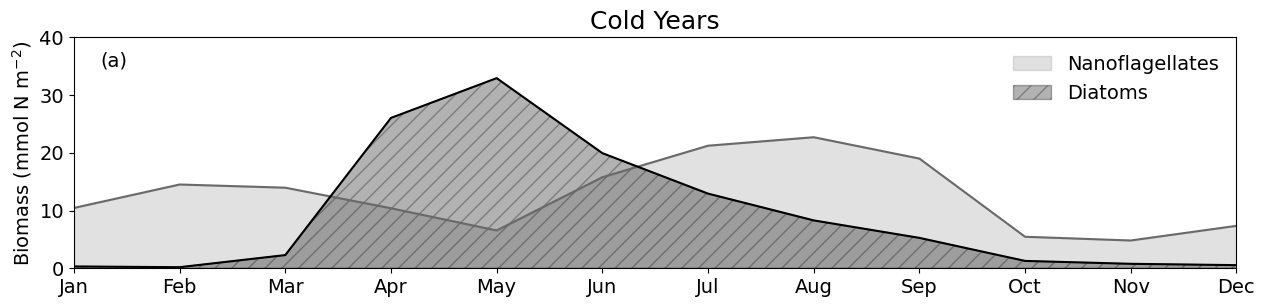

In [29]:
## Cold Years

fig, ax = plt.subplots(figsize=(15, 3))
bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 0.9}
cmap = plt.get_cmap('tab10')
palette = [cmap(0), cmap(0.2), 'k', cmap(0.1), cmap(0.3)]
xticks=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov',"Dec"]

ax.plot(xticks, NPGO_C_F_mean,color='dimgrey') #wheat
ax.fill_between(xticks,NPGO_C_F_mean,color='dimgrey',alpha=.2,label='Nanoflagellates') #wheat
ax.plot(xticks, NPGO_C_D_mean,color='black') #lightgreen
ax.fill_between(xticks,NPGO_C_D_mean,color='black',hatch='//',alpha=.3,label='Diatoms') #lightgreen
ax.set_title('Cold Years',fontsize=18)
ax.legend(frameon=False,loc=1,fontsize=14)
ax.set_ylim(0,40)
ax.set_xlim(0,11)
ax.set_ylabel('Biomass (mmol N m$^{-2}$)',fontsize=14)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)
ax.text(.25, 35, "(a)", color='k',fontsize=14)

#plt.savefig('Fig4a_phytocoldyears.png', bbox_inches='tight',dpi=1000,transparent=False)

Text(0.25, 35, '(b)')

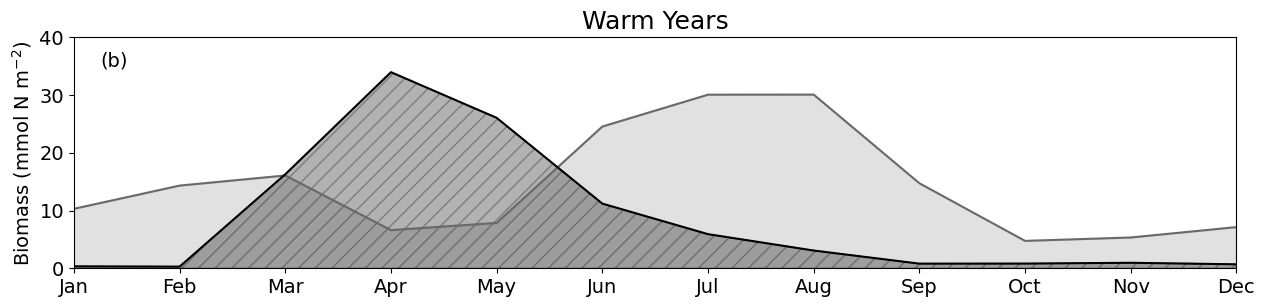

In [30]:
## Warm Years

fig, ax = plt.subplots(figsize=(15, 3))
bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 0.9}
cmap = plt.get_cmap('tab10')
palette = [cmap(0), cmap(0.2), 'k', cmap(0.1), cmap(0.3)]
xticks=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov',"Dec"]


ax.plot(xticks, NPGO_W_F_mean,color='dimgrey')
ax.fill_between(xticks,NPGO_W_F_mean,color='dimgrey',alpha=.2)
ax.plot(xticks, NPGO_W_D_mean,color='black')
ax.fill_between(xticks,NPGO_W_D_mean,color='black',hatch='//',alpha=.3)
ax.set_title('Warm Years',fontsize=18)
ax.set_ylim(0,40)
ax.set_xlim(0,11)
ax.set_ylabel('Biomass (mmol N m$^{-2}$)',fontsize=14)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)

ax.text(.25, 35, "(b)", color='k',fontsize=14)



Text(0.25, 35, '(b)')

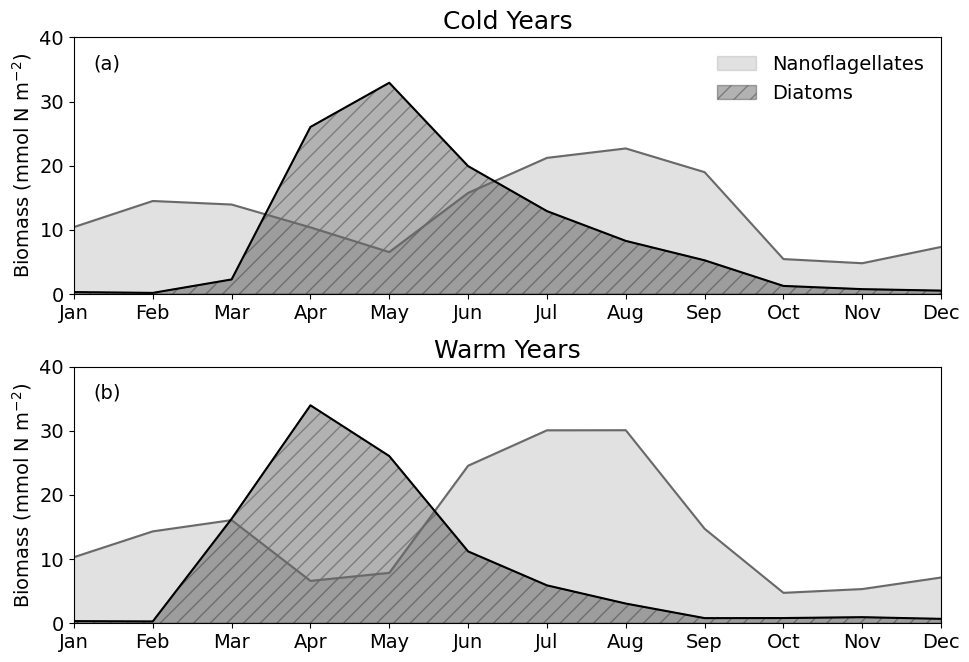

In [31]:
fig, ax = plt.subplots(2,1, figsize=(10, 7))

fig.tight_layout(pad=2.5)

bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 1}
cmap = plt.get_cmap('tab10')
palette = [cmap(0), cmap(0.2), 'k', cmap(0.1), cmap(0.3)]
xticks=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov',"Dec"]

ax[0].plot(xticks, NPGO_C_F_mean,color='dimgrey') #wheat
ax[0].fill_between(xticks,NPGO_C_F_mean,color='dimgrey',alpha=.2,label='Nanoflagellates') #wheat
ax[0].plot(xticks, NPGO_C_D_mean,color='black') #lightgreen
ax[0].fill_between(xticks,NPGO_C_D_mean,color='black',hatch='//',alpha=.3,label='Diatoms') #lightgreen
ax[0].set_title('Cold Years',fontsize=18)
ax[0].legend(frameon=False,loc=1,fontsize=14)
ax[0].set_ylim(0,40)
ax[0].set_xlim(0,11)
ax[0].set_ylabel('Biomass (mmol N m$^{-2}$)',fontsize=14)
ax[0].xaxis.set_tick_params(labelsize=14)
ax[0].yaxis.set_tick_params(labelsize=14)
ax[0].text(.25, 35, "(a)", color='k',fontsize=14)


ax[1].plot(xticks, NPGO_W_F_mean,color='dimgrey')
ax[1].fill_between(xticks,NPGO_W_F_mean,color='dimgrey',alpha=.2)
ax[1].plot(xticks, NPGO_W_D_mean,color='black')
ax[1].fill_between(xticks,NPGO_W_D_mean,color='black',hatch='//',alpha=.3)
ax[1].set_title('Warm Years',fontsize=18)
ax[1].set_ylim(0,40)
ax[1].set_xlim(0,11)
ax[1].set_ylabel('Biomass (mmol N m$^{-2}$)',fontsize=14)
ax[1].xaxis.set_tick_params(labelsize=14)
ax[1].yaxis.set_tick_params(labelsize=14)

ax[1].text(.25, 35, "(b)", color='k',fontsize=14)



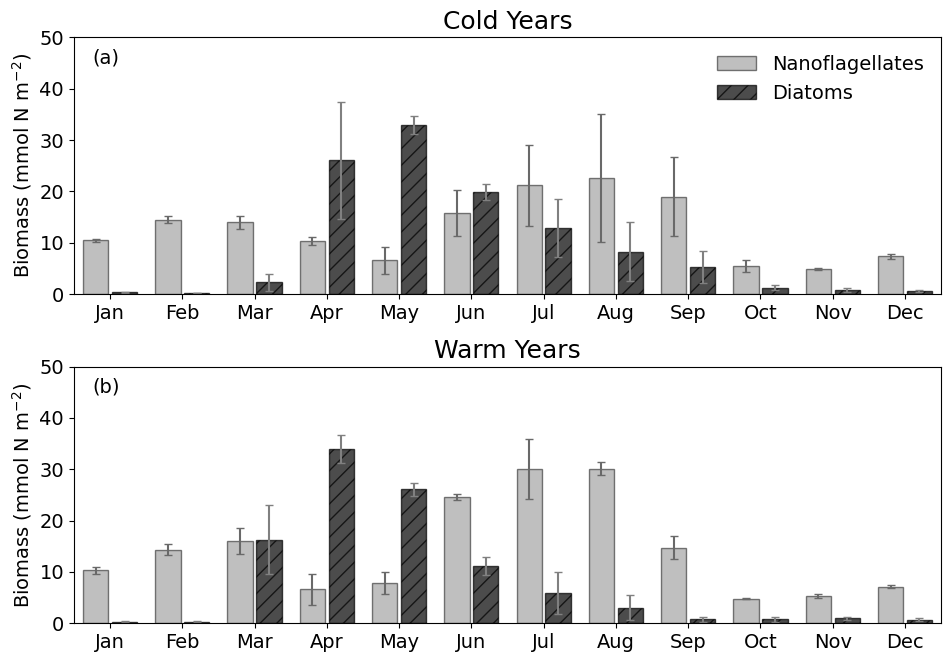

In [32]:
fig, ax = plt.subplots(2,1, figsize=(10, 7))

fig.tight_layout(pad=2.5)

bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 1}
cmap = plt.get_cmap('tab10')
palette = [cmap(0), cmap(0.2), 'k', cmap(0.1), cmap(0.3)]
xticks=np.arange(len(NPGO_C_F_mean)) 



width=0.35

ax[0].bar(xticks-0.2, NPGO_C_F_mean,width,yerr=NPGO_C_F_std,color='grey',ecolor='dimgrey',edgecolor='k',label='Nanoflagellates',alpha=0.5,capsize=3) #wheat
#ax[0].fill_between(xticks,NPGO_C_F_mean,color='dimgrey',alpha=.2,label='Nanoflagellates') #wheat
ax[0].bar(xticks + 0.2, NPGO_C_D_mean,width,yerr=NPGO_C_D_std,color='k',ecolor='grey',edgecolor='k',hatch='//',alpha=0.7,capsize=3,label='Diatoms') #lightgreen
#ax[0].fill_between(xticks,NPGO_C_D_mean,color='black',hatch='//',alpha=.3,label='Diatoms') #lightgreen
ax[0].set_title('Cold Years',fontsize=18)
ax[0].legend(frameon=False,loc=1,fontsize=14)
ax[0].set_ylim(0,50)
ax[0].set_xlim(-.5,11.5)
ax[0].set_ylabel('Biomass (mmol N m$^{-2}$)',fontsize=14)
ax[0].xaxis.set_tick_params(labelsize=14)
ax[0].yaxis.set_tick_params(labelsize=14)
ax[0].text(-.25, 45, "(a)", color='k',fontsize=14)
ax[0].set_xticks(xticks)
ax[0].set_xticklabels(('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov',"Dec"))

ax[1].bar(xticks-0.2, NPGO_W_F_mean,width,yerr=NPGO_W_F_std,color='grey',ecolor='dimgrey',edgecolor='k',alpha=0.5,capsize=3)
#ax[1].fill_between(xticks,NPGO_W_F_mean,color='dimgrey',alpha=.2)
ax[1].bar(xticks+0.2, NPGO_W_D_mean,width,yerr=NPGO_W_D_std,color='k',ecolor='grey',edgecolor='k',hatch='//',alpha=0.7,capsize=3)
#ax[1].fill_between(xticks,NPGO_W_D_mean,color='black',hatch='//',alpha=.3)
ax[1].set_title('Warm Years',fontsize=18)
ax[1].set_ylim(0,50)
ax[1].set_xlim(-0.5,11.5)
ax[1].set_ylabel('Biomass (mmol N m$^{-2}$)',fontsize=14)
ax[1].xaxis.set_tick_params(labelsize=14)
ax[1].yaxis.set_tick_params(labelsize=14)
ax[1].set_xticks(xticks)
ax[1].set_xticklabels(('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov',"Dec"))
ax[1].text(-.25, 45, "(b)", color='k',fontsize=14)

#plt.savefig('Figure5_PhytoplanktonBiomass.png', bbox_inches='tight',dpi=1000,transparent=False)